About

Text Generation is a type of Language Modelling problem. Language Modelling is the core problem for a number of of natural language processing tasks such as speech to text, conversational system, and text summarization. A trained language model learns the likelihood of occurrence of a word based on the previous sequence of words used in the text. Language models can be operated at character level, n-gram level, sentence level or even paragraph level


# Import Libs

In [7]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:

# data= "I let it fall, my heart  \n And as it fell, you rose to claim it  \n It was dark and I was over  \n Until you kissed my lips and you saved me  \n My hands, they're strong  \n But my knees were far too weak  \n To stand in your arms  \n Without falling to your feet \n But there's a side to you \n That I never knew, never knew \n All the things you'd say \n They were never true, never true \n And the games you play \n You would always win, always win \n But I set fire to the rain   \n Watched it pour as I touched your face \n Well, it burned while I cried  \n Cause I heard it screaming out your name Your name When I lay with you \n  I could stay there Close my eyes \n Feel you here forever \n You and me together, nothing gets better \n Cause there's a side to you  \n That I never knew, never knew \n All the things you'd say  \n They were never true, never true \n And the games you'd play \n You would always win, always win \n But I set fire to the rain \n Watched it pour as I touched your face \n Well, it burned while I cried \n Cause I heard it screaming out your name  \n I set fire to the rain \n And I threw us into the flames \n When it fell, something died \n Cause I knew that that was \n The last time, the last time \n Sometimes I wake up by the door \n That heart you caught must be waiting for you \n Even now, when we're already over \n I can't help myself from looking for you \n I set fire to the rain \n Watched it pour as I touched your face \n Well, it burned while I cried \n Cause I heard it screaming out your name  \n I set fire to the rain  \n And I threw us into the flames  \n When it fell, something died  \n Cause I knew that that was the last time  \n The last time  \n Oh, oh, no  \n Let it burn  \n Oh, oh  \n Let it burn \n Let it burn"


In [21]:
# Define the lyrics of Adele song

data= "I let it fall my heart \n And as it fell you rose to claim it \n It was dark and I was over \n Until you kissed my lips and you saved me  \n My hands they're strong  \n But my knees were far too weak  \n To stand in your arms  \n Without falling to your feet \n But there's a side to you \n That I never knew never knew \n All the things you'd say \n They were never true never true \n And the games you play \n You would always win always win \n But I set fire to the rain   \n Watched it pour as I touched your face \n Well it burned while I cried  \n Cause I heard it screaming out your name Your name When I lay with you \n  I could stay there Close my eyes \n Feel you here forever \n You and me together nothing gets better \n Cause there's a side to you  \n That I never knew never knew \n All the things you'd say  \n They were never true never true \n And the games you'd play \n You would always win always win \n But I set fire to the rain \n Watched it pour as I touched your face \n Well it burned while I cried \n Cause I heard it screaming out your name  \n I set fire to the rain \n And I threw us into the flames \n When it fell something died \n Cause I knew that that was \n The last time the last time \n Sometimes I wake up by the door \n That heart you caught must be waiting for you \n Even now when we're already over \n I can't help myself from looking for you \n I set fire to the rain \n Watched it pour as I touched your face \n Well it burned while I cried \n Cause I heard it screaming out your name  \n I set fire to the rain  \n And I threw us into the flames  \n When it fell something died  \n Cause I knew that that was the last time  \n The last time  \n Oh oh no  \n Let it burn  \n Oh oh  \n Let it burn \n Let it burn"
# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['i let it fall my heart ', ' and as it fell you rose to claim it ', ' it was dark and i was over ', ' until you kissed my lips and you saved me  ', " my hands they're strong  ", ' but my knees were far too weak  ', ' to stand in your arms  ', ' without falling to your feet ', " but there's a side to you ", ' that i never knew never knew ', " all the things you'd say ", ' they were never true never true ', ' and the games you play ', ' you would always win always win ', ' but i set fire to the rain   ', ' watched it pour as i touched your face ', ' well it burned while i cried  ', ' cause i heard it screaming out your name your name when i lay with you ', '  i could stay there close my eyes ', ' feel you here forever ', ' you and me together nothing gets better ', " cause there's a side to you  ", ' that i never knew never knew ', " all the things you'd say  ", ' they were never true never true ', " and the games you'd play ", ' you would always win always win ', ' but i set fire to th

In [22]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'i': 1, 'it': 2, 'the': 3, 'you': 4, 'to': 5, 'your': 6, 'and': 7, 'never': 8, 'that': 9, 'knew': 10, 'cause': 11, 'my': 12, 'set': 13, 'fire': 14, 'rain': 15, 'let': 16, 'as': 17, 'was': 18, 'but': 19, 'true': 20, 'always': 21, 'win': 22, 'name': 23, 'when': 24, 'last': 25, 'time': 26, 'oh': 27, 'fell': 28, 'were': 29, "you'd": 30, 'watched': 31, 'pour': 32, 'touched': 33, 'face': 34, 'well': 35, 'burned': 36, 'while': 37, 'cried': 38, 'heard': 39, 'screaming': 40, 'out': 41, 'burn': 42, 'heart': 43, 'over': 44, 'me': 45, "there's": 46, 'a': 47, 'side': 48, 'all': 49, 'things': 50, 'say': 51, 'they': 52, 'games': 53, 'play': 54, 'would': 55, 'threw': 56, 'us': 57, 'into': 58, 'flames': 59, 'something': 60, 'died': 61, 'for': 62, 'fall': 63, 'rose': 64, 'claim': 65, 'dark': 66, 'until': 67, 'kissed': 68, 'lips': 69, 'saved': 70, 'hands': 71, "they're": 72, 'strong': 73, 'knees': 74, 'far': 75, 'too': 76, 'weak': 77, 'stand': 78, 'in': 79, 'arms': 80, 'without': 

## Preprocessing the Dataset

Next, we will generate the training sequences and their labels.
This's done by taking each line of the song and generate inputs and labels from it. 

For example, if we only have one sentence: "I set fire rain", we want the model to learn the next word given any subphrase of this sentence:

```
INPUT              LABEL
-----------------------------
I             ---> let
I let           ---> it
I let it      ---> fall
```
The next cell shows how to implement this concept in code. The result would be inputs as padded sequences, and labels as one-hot encoded arrays.

In [23]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:
	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]
	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]
		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])


# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]


# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Here's the result for the first line of the song. The particular line and the expected token sequence 

In [31]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['i', 'let', 'it', 'fall', 'my', 'heart']
[1, 16, 2, 63, 12, 43]


Since there are 6 tokens here, we can expect to find this particular line in the first 5 elements of the xs that we  generated earlier.

 If we get the longest subphrase generated, that should be found in xs[5]. See the padded token sequence below:

In [33]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [ 0  0  0  0  0  0  0  0  0  1 16  2 63 12]
decoded to text: ['i let it fall my']


If you print out the label, it should show 43 because that is the next word in the phrase (i.e. heart). See the one-hot encoded form below. we can use the np.argmax() method to get the index of the 'hot' label.

In [34]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 43


## Build Model

We are going to build a simple model, `however` we use a softmax activated `Dense` layer . 

This output layer will have one neuron for each word in the vocabulary. So given an input token list, the output array of the final layer will have the probabilities for each word.

In [35]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 64)            7488      
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 117)               4797      
                                                                 
Total params: 25,885
Trainable params: 25,885
Non-trainable params: 0
_________________________________________________________________


## Train model

we can now train the model. We have a relatively small vocabulary so it will only take a couple of minutes to complete 500 epochs.

In [36]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
9/9 [==============================] - 5s 17ms/step - loss: 4.7608 - accuracy: 0.0142
Epoch 2/500
9/9 [==============================] - 0s 15ms/step - loss: 4.7401 - accuracy: 0.0641
Epoch 3/500
9/9 [==============================] - 0s 15ms/step - loss: 4.7132 - accuracy: 0.0712
Epoch 4/500
9/9 [==============================] - 0s 14ms/step - loss: 4.6577 - accuracy: 0.0712
Epoch 5/500
9/9 [==============================] - 0s 24ms/step - loss: 4.5459 - accuracy: 0.0712
Epoch 6/500
9/9 [==============================] - 0s 23ms/step - loss: 4.4159 - accuracy: 0.0712
Epoch 7/500
9/9 [==============================] - 0s 26ms/step - loss: 4.3345 - accuracy: 0.0712
Epoch 8/500
9/9 [==============================] - 0s 27ms/step - loss: 4.2875 - accuracy: 0.0712
Epoch 9/500
9/9 [==============================] - 0s 25ms/step - loss: 4.2567 - accuracy: 0.0712
Epoch 10/500
9/9 [==============================] - 0s 27ms/step - loss: 4.2310 - accuracy: 0.0712
Epoch 11/500
9/9 [=

The model achieves 94% accuracy after 500 epochs.

# Visualize the results 

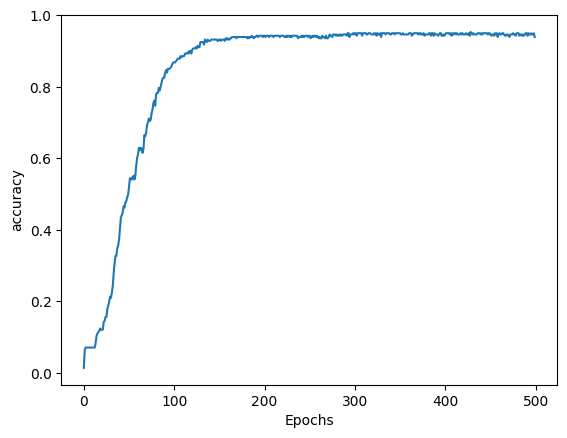

In [43]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  # plt.figure(figsize=(3, 3))
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# Test Model - Generating Text

With the model trained, we can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. 

In [46]:
# Define seed text
seed_text = "I travelled to USA"

# Define total words to predict
next_words = 20

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word


1/1 [==============================] - 0s 25ms/step


In [47]:
# Print the result	
print(seed_text)

I travelled to USA never knew never knew never knew never knew never knew never knew never knew never knew never knew never knew


In the output above, we might notice frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. 

Basically, instead of getting the index with max probability, we can get the top three indices and choose one at random. See if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three.

In [50]:
# Define seed text
seed_text = "I travelled to USA"

# Define total words to predict
next_words = 20

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word


1/1 [==============================] - 0s 24ms/step


In [51]:
# Print the result	
print(seed_text)

I travelled to USA it face fell you must must be for my waiting looking now for feet for flames for flames feet you


# Improvement Ideas

As we can see, the model has produced an output which quickly become gibberish or repetitive . 

Even if we tweak the hyperparameters, the model will still be limited by its vocabulary of only 117 words. The model will be more flexible if we train it on a much larger corpus.

The results can be improved further with following points:

Adding more data
Fine Tuning the network architecture
Fine Tuning the network parameters



In [ ]:
https://www.kaggle.com/code/aggarwalrahul/nlp-lstm-text-generation-beginner-guide